In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from requests.exceptions import ConnectionError

In [52]:
# GitHub repo that updates COVID-19 numbers every day at midnight, the data is provided by the Johns Hopkins University
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

try:
    # using 'requests.get', I check if there is a valid connection to the GitHub servers. If not, a ConnectionError is
    # thrown. which gets caught. If the response is 200, everything is okay and the .csv file is downloaded
    response = requests.get(url)
    covid_cases = pd.read_csv(url)
    
except ConnectionError as error:
    
    print("Connection Error: Failed to establish a new connection, please try again later")


In [53]:
# dropping unnecessary columns and summing up the case numbers of countries that are split into different regions, such as
# Australia pr China. Single region countries stay the same
covid_cases.drop(["Lat", "Long"], axis=1, inplace=True)
no_avg = covid_cases.groupby("Country/Region").sum()

In [54]:
# renaming specific countries to make it easier to look them up
no_avg = no_avg.rename(index={"US": "United States", "Taiwan*": "Taiwand", "Korea, South": "South Korea"})

In [55]:
three_day_avg = no_avg.rolling(window=3, axis=1).mean()
five_day_avg = no_avg.rolling(window=5, axis=1).mean()

Text(0.1, 0.03, 'Source: Johns Hopkins University Corona Data \nhttps://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/ \ncsse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

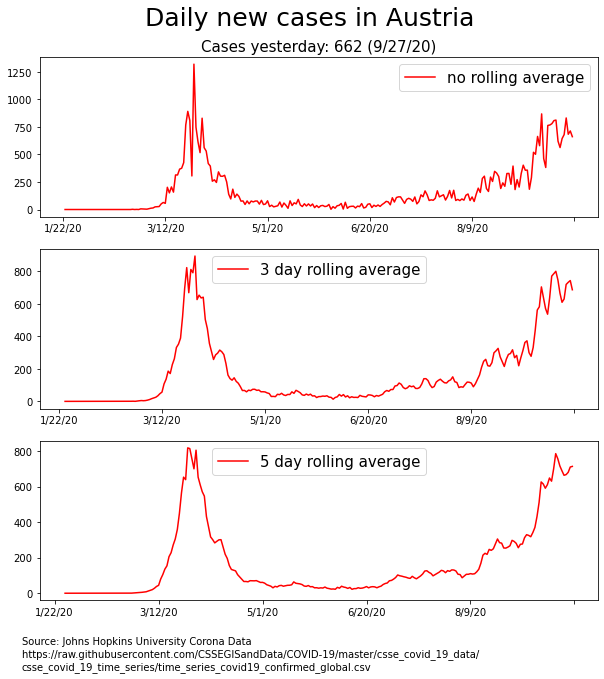

In [57]:
# Enter a country to see its daily cases over time
country = "Austria"

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 10))

plt.suptitle(f"Daily new cases in {country}", fontsize=25, y=0.95)

# By using '.diff', I turn the time series of total cases in a country into a time series of daily cases
no_avg.loc[country].diff().plot(color="red", ax=ax1)
three_day_avg.loc[country].diff().plot(color="red", ax=ax2)
five_day_avg.loc[country].diff().plot(color="red", ax=ax3)

latest_cases = int(no_avg.loc[country].diff()[-1])
latest_date = no_avg.columns[-1]

# fig.set_facecolor("sandybrown")
# ax1.set_facecolor("lightsalmon")
ax1.set_title(f"Cases yesterday: {latest_cases} ({latest_date})", fontsize=15)
# ax2.set_facecolor("lightsalmon")
# ax3.set_facecolor("lightsalmon")

ax1.legend(["no rolling average"], fontsize=15)
ax2.legend(["3 day rolling average"], fontsize=15)
ax3.legend(["5 day rolling average"], fontsize=15)

fig.text(x=0.1, y=0.03, s="Source: Johns Hopkins University Corona Data \nhttps://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/ \ncsse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

# commented out: the option to save the figure locally
#plt.savefig("austria_27_07.png")

In [24]:
print(covid_cases.loc["Austria"].diff().max())

1321.0


In [13]:
covid_cases.iloc[:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162
Albania,0,0,0,0,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380
Algeria,0,0,0,0,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146
Andorra,0,0,0,0,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124
Angola,0,0,0,0,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,18313,18476,18802,19213,19678,20155,20677,21251,21668,22204
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,1906,1907,1911,1916,1924,1930,1933,1943,1946,1953


generator